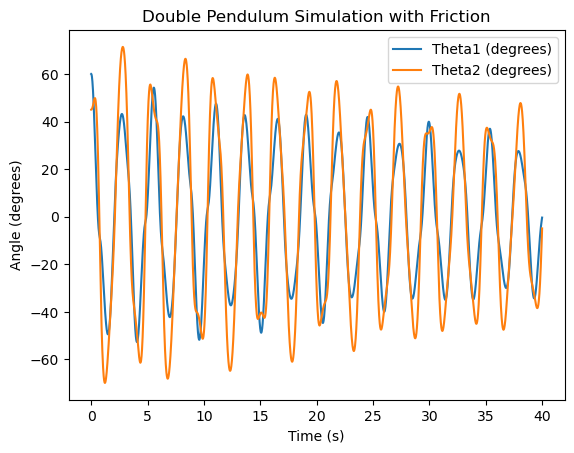

In [3]:
# Future imports for division and print function compatibility
from __future__ import division, print_function

# Standard imports
from math import sin, cos, pi, radians, degrees
import numpy as np
import matplotlib.pyplot as plt

# Physical constants
g = 9.81  # Acceleration due to gravity (m/s^2)
L1 = 1  # Length of the first pendulum (m)
L2 = 1  # Length of the second pendulum (m)
m1 = 1.0  # Mass of the first pendulum (kg)
m2 = 1.0  # Mass of the second pendulum (kg)

# Friction/damping coefficients (constant)
damping1 = 0.05  # Damping for the first pendulum
damping2 = 0.05  # Damping for the second pendulum

# Derivative function for the double pendulum system with friction
def f(r, t, g, L1, L2, m1, m2, damping1, damping2):
    theta1 = r[0]
    omega1 = r[1]
    theta2 = r[2]
    omega2 = r[3]

    # Equations of motion for the double pendulum with friction
    ftheta1 = omega1
    fomega1 = (
        -g * (2 * m1 + m2) * sin(theta1)
        - m2 * g * sin(theta1 - 2 * theta2)
        - 2 * sin(theta1 - theta2) * m2 * (omega2 ** 2 * L2 + omega1 ** 2 * L1 * cos(theta1 - theta2))
        - damping1 * omega1  # Damping term for the first pendulum
    ) / (L1 * (2 * m1 + m2 - m2 * cos(2 * theta1 - 2 * theta2)))

    ftheta2 = omega2
    fomega2 = (
        2 * sin(theta1 - theta2) * (omega1 ** 2 * L1 * (m1 + m2) 
        + g * (m1 + m2) * cos(theta1) 
        + omega2 ** 2 * L2 * m2 * cos(theta1 - theta2))
        - damping2 * omega2  # Damping term for the second pendulum
    ) / (L2 * (2 * m1 + m2 - m2 * cos(2 * theta1 - 2 * theta2)))

    return np.array([ftheta1, fomega1, ftheta2, fomega2], float)

# Simulation parameters
a = 0.0  # Start time
b = 40.0  # End time
N = 3000  # Number of time steps
h = (b - a) / N  # Time step size

# Time points
tpoints = np.arange(a, b, h)

# Pre-allocate arrays for theta1 and theta2
theta1_points = np.zeros_like(tpoints)
theta2_points = np.zeros_like(tpoints)

# Input initial conditions in degrees
theta1_deg = 60  # Initial angle for the first pendulum in degrees
omega1_deg = 0   # Initial angular velocity for the first pendulum in degrees per second
theta2_deg = 45  # Initial angle for the second pendulum in degrees
omega2_deg = 0   # Initial angular velocity for the second pendulum in degrees per second

# Convert initial conditions to radians for computation
q = np.array([radians(theta1_deg), radians(omega1_deg), radians(theta2_deg), radians(omega2_deg)], float)

# Runge-Kutta 4th order method loop
for i, t in enumerate(tpoints):
    # Store the angles in degrees for plotting
    theta1_points[i] = degrees(q[0])  # Convert radians to degrees
    theta2_points[i] = degrees(q[2])  # Convert radians to degrees

    # RK4 coefficients
    k1 = h * f(q, t, g, L1, L2, m1, m2, damping1, damping2)
    k2 = h * f(q + 0.5 * k1, t + 0.5 * h, g, L1, L2, m1, m2, damping1, damping2)
    k3 = h * f(q + 0.5 * k2, t + 0.5 * h, g, L1, L2, m1, m2, damping1, damping2)
    k4 = h * f(q + k3, t + h, g, L1, L2, m1, m2, damping1, damping2)

    # Update the state vector
    q += (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Plotting
plt.plot(tpoints, theta1_points, label='Theta1 (degrees)')
plt.plot(tpoints, theta2_points, label='Theta2 (degrees)')
plt.title("Double Pendulum Simulation with Friction")
plt.xlabel("Time (s)")
plt.ylabel("Angle (degrees)")
plt.legend()
plt.show()